In [ ]:
!wget -nc -q https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat
!wget -nc -q https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat

In [38]:
import networkx as nx
import math
from PIL import Image, ImageDraw
import pyproj
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
G = nx.DiGraph()

In [ ]:
airports = open("airports.dat", "r")
while True:
    line = airports.readline()

    if not line:
        break

    p = line.split(",")

    #wrongly formated lines
    if p[4] == "\\N" or len(p[4])!=5: continue;
    print(p[4].strip('\"'), p[6], p[7])
    G.add_node(p[4].strip('\"'), pos=(p[6],p[7]))

airports.close()

In [ ]:
print(len(G.nodes))
print(len(G.edges))

In [ ]:
routes = open("routes.dat", "r")

while True:
    line = routes.readline()

    if not line:
        break

    p = line.split(",")
    print(p[2], p[4])
    G.add_edge(p[2], p[4])

routes.close()

In [ ]:
print(len(G.nodes))
print(len(G.edges))

In [ ]:
H = G.copy()
for node in H.nodes(data=True) :
  if node[1] == {}:
    G.remove_node(node[0])

In [ ]:
print(len(G.nodes))
print(len(G.edges))

In [ ]:
G.is_directed()

In [ ]:
nodes = sorted(G.degree, key=lambda x: x[1])
print(nodes)
print(G.degree)

In [ ]:
for node in nodes :
  if node[1] == 0:
    G.remove_node(node[0])

In [ ]:
nodes = sorted(G.degree, key=lambda x: x[1])
print(nodes)

In [ ]:
print(len(G.nodes))
print(len(G.edges))

In [ ]:
print(G.degree("LIS"))

In [ ]:
# Graph density
nx.density(G)

In [ ]:
# Graph diameter
nx.diameter(G)

477


(array([5.142e+03, 4.010e+02, 1.440e+02, 1.130e+02, 5.900e+01, 5.000e+01,
        4.700e+01, 4.100e+01, 2.300e+01, 2.900e+01, 2.100e+01, 1.800e+01,
        1.400e+01, 9.000e+00, 1.200e+01, 1.100e+01, 1.100e+01, 1.100e+01,
        7.000e+00, 4.000e+00, 9.000e+00, 5.000e+00, 1.000e+00, 5.000e+00,
        4.000e+00, 2.000e+00, 5.000e+00, 2.000e+00, 6.000e+00, 2.000e+00,
        4.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 2.000e+00]),
 array([  0.        ,  10.14893617,  20.29787234,  30.44680851,
         40.59574468,  50.74468085,  60.89361702,  71.04255319,
         81.19148936,  91.34042553, 101.4893617 , 111.63829787,
        121.78723404, 131.93617021, 142.08510638, 152.23404255,
        162.38297872, 172.53191489, 182.68085106, 192.82978723,
        202.9787234 , 213.12765957, 223.27659574, 233.42553191,
        243.57446809, 253.7234042

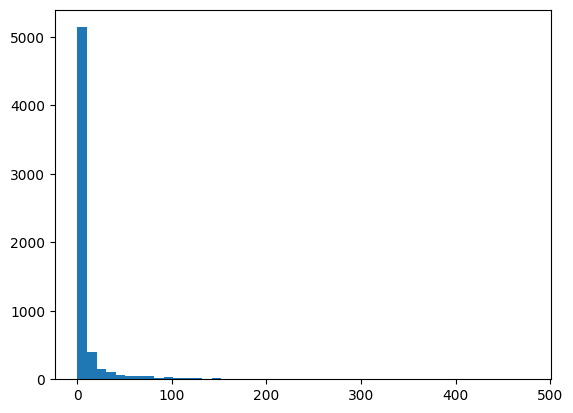

In [49]:
# Degree Distribution
degrees = [G.degree(n) for n in G.nodes()]
print(max(degrees))
plt.hist(degrees, bins=int(max(degrees)/10))
# for i in range(0, max(degrees)):
#   print(i, degrees.count(i))

In [ ]:
# compute graph degree centrality
dc = nx.degree_centrality(G)
print(max(dc))
print(min(dc))
# compute eigen vector centrality
ec = nx.eigenvector_centrality(G)
print(max(ec))
print(min(ec))
# compute closeness centrality
cc = nx.closeness_centrality(G)
print(max(cc))
print(min(cc))
# compute betweenness centrality
bc = nx.betweenness_centrality(G)
print(max(bc))
print(min(bc))
# compute pagerank
pr = nx.pagerank(G)
print(max(pr))
print(min(pr))
# compute clustering coefficient
cl = nx.clustering(G)
print(cl)

In [ ]:
G.nodes['LIS']

In [ ]:
# Draw the graph in a map
# latitude = float(G.nodes['LIS'].get('pos')[0])
# longitude = float(G.nodes['LIS'].get('pos')[1])

# #resolution of image you are using
# mapWidth = 2048;
# mapHeight = 1025;

# #get x value
# x = (mapWidth*(180+longitude)/360)%mapWidth+(mapWidth/2);
# #convert from degrees to radians
# latRad = latitude*math.pi/180;
# #get y value
# mercN = math.log(math.tan((math.pi/4)+(latRad/2)));
# y = (mapHeight/2)-(mapWidth*mercN/(2*math.pi));
# print(x, y)

# Define the source and destination projections
source_projection = pyproj.Proj(init='epsg:4326')  # WGS 84 (standard lat/lon)
destination_projection = pyproj.Proj(init='epsg:3857')  # Web Mercator

# Input geographic coordinates (longitude, latitude)
lon, lat = float(G.nodes['LIS'].get('pos')[0]), float(G.nodes['LIS'].get('pos')[1])  # Example coordinates for New York City

# Project the coordinates to the destination projection
x, y = pyproj.transform(source_projection, destination_projection, lon, lat)
print(x, y)

def project_to_pixel(x, y, scale, x_offset, y_offset):
    pixel_x = (x - x_offset) * scale
    pixel_y = (y - y_offset) * scale
    return pixel_x, pixel_y

# Calculate the pixel coordinates
scale = 0.00001 # Adjust as needed
x_offset, y_offset = 0, 0  # Adjust as needed
x, y = project_to_pixel(x, y, scale, x_offset, y_offset)
print(x, y)
image = Image.open("openflights-apdb-2048.png")
draw = ImageDraw.Draw(image)
draw.ellipse((x,y, x+50, y+50), fill="black")
image.show()